# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Importamos los datos

In [1]:
path = '../../../Base de datos/Trayectorias 50 eval'

## Datos de entrenamiento

### Datos

In [5]:
varftrain = np.load(path + '/varftrain.npy')

In [6]:
np.shape(varftrain)

(7000, 10, 2, 50)

### Coeficientes

In [7]:
coefvarftrain = np.load(path + '/coefvarftrain.npy')

In [8]:
np.shape(coefvarftrain)

(7000, 7)

## Datos de prueba

### Datos

In [9]:
varftest = np.load(path + '/varftest.npy')

In [10]:
np.shape(varftest)

(2000, 10, 2, 50)

### Coeficientes

In [11]:
coefvarftest = np.load(path + '/coefvarftest.npy')

In [12]:
np.shape(coefvarftest)

(2000, 7)

## Datos de validación

### Datos

In [13]:
varfval = np.load(path + '/varfval.npy')

In [14]:
np.shape(varfval)

(1000, 10, 2, 50)

### Coeficienes

In [15]:
coefvarfval = np.load(path + '/coefvarfval.npy')

In [16]:
np.shape(coefvarfval)

(1000, 7)

# Unimos coeficientes con los datos

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((varftrain, coefvarftrain))
test_dataset = tf.data.Dataset.from_tensor_slices((varftest, coefvarftest))
val_dataset = tf.data.Dataset.from_tensor_slices((varfval, coefvarfval))

In [18]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(10, 2, 50), dtype=tf.float64, name=None), TensorSpec(shape=(7,), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [19]:
BATCH_SIZE = 100
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [21]:
#model = Sequential()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,2,50)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7)
])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                        

# Entrenamos el modelo

In [23]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['mae'])

In [24]:
def scheduler(epoch, lr):
  if epoch < 250:
    return lr
  else:
    return 1e-3 * 0.99 ** epoch

In [25]:
val_epochs = 507
tf.compat.v1.global_variables_initializer()

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 500,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/507
70/70 [==============================] - 1s 6ms/step - loss: 28.4138 - mae: 4.5219 - val_loss: 23.8738 - val_mae: 4.0706 - lr: 0.0010
Epoch 2/507
70/70 [==============================] - 0s 5ms/step - loss: 21.6224 - mae: 3.8911 - val_loss: 13.2963 - val_mae: 2.9662 - lr: 0.0010
Epoch 3/507
70/70 [==============================] - 0s 5ms/step - loss: 12.5701 - mae: 2.8498 - val_loss: 9.7779 - val_mae: 2.5167 - lr: 0.0010
Epoch 4/507
70/70 [==============================] - 0s 5ms/step - loss: 7.7336 - mae: 2.2456 - val_loss: 6.8406 - val_mae: 2.1319 - lr: 0.0010
Epoch 5/507
70/70 [==============================] - 0s 5ms/step - loss: 6.9572 - mae: 2.1387 - val_loss: 6.5221 - val_mae: 2.0863 - lr: 0.0010
Epoch 6/507
70/70 [==============================] - 0s 5ms/step - loss: 6.8124 - mae: 2.1180 - val_loss: 6.5649 - val_mae: 2.0747 - lr: 0.0010
Epoch 7/507
70/70 [==============================] - 0s 5ms/step - loss: 6.6587 - mae: 2.0900 - val_loss: 6.1380 - val_mae: 2.0183 

70/70 [==============================] - 0s 6ms/step - loss: 5.1149 - mae: 1.7841 - val_loss: 5.0740 - val_mae: 1.7690 - lr: 0.0010
Epoch 114/507
70/70 [==============================] - 0s 6ms/step - loss: 5.1629 - mae: 1.7973 - val_loss: 4.9584 - val_mae: 1.7317 - lr: 0.0010
Epoch 115/507
70/70 [==============================] - 0s 6ms/step - loss: 5.0824 - mae: 1.7783 - val_loss: 4.9065 - val_mae: 1.7234 - lr: 0.0010
Epoch 116/507
70/70 [==============================] - 0s 5ms/step - loss: 5.0504 - mae: 1.7729 - val_loss: 4.9283 - val_mae: 1.7355 - lr: 0.0010
Epoch 117/507
70/70 [==============================] - 0s 6ms/step - loss: 5.0884 - mae: 1.7806 - val_loss: 4.9892 - val_mae: 1.7478 - lr: 0.0010
Epoch 118/507
70/70 [==============================] - 0s 6ms/step - loss: 5.0787 - mae: 1.7790 - val_loss: 4.9539 - val_mae: 1.7431 - lr: 0.0010
Epoch 119/507
70/70 [==============================] - 0s 5ms/step - loss: 5.1241 - mae: 1.7882 - val_loss: 5.0730 - val_mae: 1.7803 - lr:

70/70 [==============================] - 0s 5ms/step - loss: 4.2363 - mae: 1.6162 - val_loss: 5.5615 - val_mae: 1.8165 - lr: 0.0010
Epoch 226/507
70/70 [==============================] - 0s 5ms/step - loss: 4.2733 - mae: 1.6273 - val_loss: 5.5129 - val_mae: 1.8185 - lr: 0.0010
Epoch 227/507
70/70 [==============================] - 0s 5ms/step - loss: 4.2216 - mae: 1.6134 - val_loss: 5.6253 - val_mae: 1.8214 - lr: 0.0010
Epoch 228/507
70/70 [==============================] - 0s 5ms/step - loss: 4.2654 - mae: 1.6251 - val_loss: 5.6228 - val_mae: 1.8254 - lr: 0.0010
Epoch 229/507
70/70 [==============================] - 0s 5ms/step - loss: 4.2116 - mae: 1.6156 - val_loss: 5.5640 - val_mae: 1.8258 - lr: 0.0010
Epoch 230/507
70/70 [==============================] - 0s 5ms/step - loss: 4.2777 - mae: 1.6263 - val_loss: 5.6500 - val_mae: 1.8319 - lr: 0.0010
Epoch 231/507
70/70 [==============================] - 0s 5ms/step - loss: 4.2218 - mae: 1.6190 - val_loss: 5.5425 - val_mae: 1.8154 - lr:

Epoch 335/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6635 - mae: 1.5024 - val_loss: 5.7134 - val_mae: 1.8089 - lr: 3.4846e-05
Epoch 336/507
70/70 [==============================] - 0s 5ms/step - loss: 3.7127 - mae: 1.5081 - val_loss: 5.7216 - val_mae: 1.8106 - lr: 3.4498e-05
Epoch 337/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6419 - mae: 1.4936 - val_loss: 5.7264 - val_mae: 1.8104 - lr: 3.4153e-05
Epoch 338/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6580 - mae: 1.4988 - val_loss: 5.7199 - val_mae: 1.8088 - lr: 3.3811e-05
Epoch 339/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6949 - mae: 1.5064 - val_loss: 5.7347 - val_mae: 1.8109 - lr: 3.3473e-05
Epoch 340/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6801 - mae: 1.5046 - val_loss: 5.7340 - val_mae: 1.8112 - lr: 3.3138e-05
Epoch 341/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6863 - mae: 1.5075 - va

Epoch 390/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6152 - mae: 1.4896 - val_loss: 5.7465 - val_mae: 1.8119 - lr: 2.0049e-05
Epoch 391/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6308 - mae: 1.4951 - val_loss: 5.7506 - val_mae: 1.8128 - lr: 1.9848e-05
Epoch 392/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6523 - mae: 1.4959 - val_loss: 5.7578 - val_mae: 1.8136 - lr: 1.9650e-05
Epoch 393/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6294 - mae: 1.4922 - val_loss: 5.7531 - val_mae: 1.8129 - lr: 1.9453e-05
Epoch 394/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6916 - mae: 1.5059 - val_loss: 5.7545 - val_mae: 1.8135 - lr: 1.9259e-05
Epoch 395/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6841 - mae: 1.5054 - val_loss: 5.7534 - val_mae: 1.8128 - lr: 1.9066e-05
Epoch 396/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6683 - mae: 1.5024 - va

Epoch 445/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6287 - mae: 1.4936 - val_loss: 5.7655 - val_mae: 1.8139 - lr: 1.1535e-05
Epoch 446/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6266 - mae: 1.4920 - val_loss: 5.7644 - val_mae: 1.8134 - lr: 1.1420e-05
Epoch 447/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6619 - mae: 1.4989 - val_loss: 5.7611 - val_mae: 1.8130 - lr: 1.1306e-05
Epoch 448/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6573 - mae: 1.4991 - val_loss: 5.7693 - val_mae: 1.8144 - lr: 1.1193e-05
Epoch 449/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6410 - mae: 1.4959 - val_loss: 5.7677 - val_mae: 1.8131 - lr: 1.1081e-05
Epoch 450/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6778 - mae: 1.5061 - val_loss: 5.7692 - val_mae: 1.8142 - lr: 1.0970e-05
Epoch 451/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6121 - mae: 1.4919 - va

Epoch 500/507
70/70 [==============================] - 0s 5ms/step - loss: 3.5839 - mae: 1.4843 - val_loss: 5.7672 - val_mae: 1.8139 - lr: 6.6369e-06
Epoch 501/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6201 - mae: 1.4930 - val_loss: 5.7632 - val_mae: 1.8131 - lr: 6.5705e-06
Epoch 502/507
70/70 [==============================] - 0s 5ms/step - loss: 3.5933 - mae: 1.4864 - val_loss: 5.7621 - val_mae: 1.8131 - lr: 6.5048e-06
Epoch 503/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6187 - mae: 1.4918 - val_loss: 5.7626 - val_mae: 1.8135 - lr: 6.4397e-06
Epoch 504/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6242 - mae: 1.4925 - val_loss: 5.7721 - val_mae: 1.8142 - lr: 6.3753e-06
Epoch 505/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6383 - mae: 1.4935 - val_loss: 5.7731 - val_mae: 1.8152 - lr: 6.3116e-06
Epoch 506/507
70/70 [==============================] - 0s 5ms/step - loss: 3.6093 - mae: 1.4885 - va

# Analizamos accuracy y loss

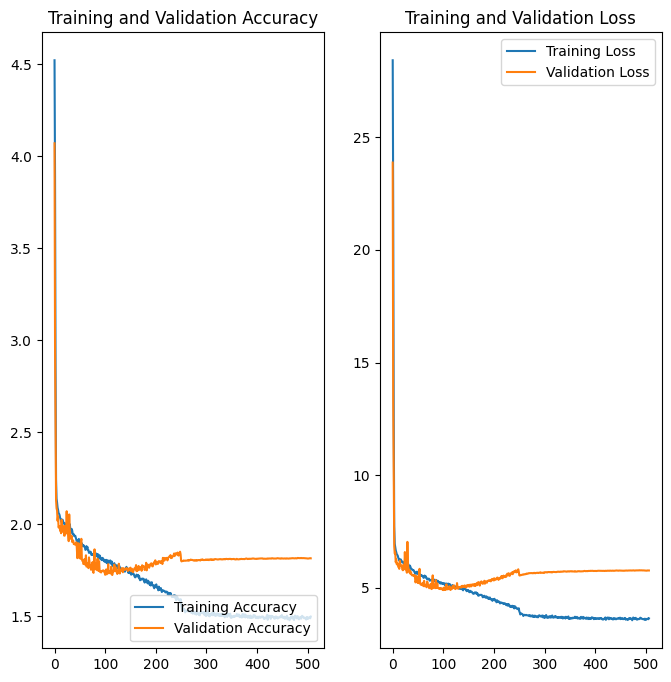

In [26]:
acc = history.history['mae']
val_acc = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(507)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Guardamos los datos Accuracy y Loss

In [27]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../Gráficas finales/historytrayec50.csv', index=False)

# Guardamos el modelo

In [28]:
path_to_save = 'D:/Documentos de trabajo/Maestría/Tesis Maestría/Trabajo Python Tesis/Github Tesis/Modelos/Modelos 20,50'

In [29]:
model.save(path_to_save + '/trayectorias50.h5')

# Importamos el modelo

In [30]:
new_model = keras.models.load_model('../../Modelos/Modelos 20,50/trayectorias50.h5')

# Probamos el modelo con datos nuevos

## Creamos nuevos datos

In [31]:
import random
from scipy.integrate import solve_ivp

varf = []
coef = []
contador = 0
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 50)

    varfci2 = []
    for i_ci in range(0, 10):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])

        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        varfci = np.append([var1], [var2], axis=0)
        varfci2.append(varfci)

       

    varf= varfci2
    print('--------------------------------------------')
    print(coef1)
    print(np.shape(varf))
    contador = contador+1
    print(contador)

varf = np.array(varf)
coef = np.array(coef)

--------------------------------------------
[5, 10, 3, 2, 9, 6, 2]
(10, 2, 50)
1


In [32]:
varfnone = varf[None, :]

## Predecimos con los datos nuevos

In [33]:
new_predictions = new_model.predict(campvecnone)
new_predictions = np.round(new_predictions)
new_predictions = np.clip(new_predictions, 0, None)
print(new_predictions)

1/1 [==============================] - 0s 65ms/step
[[2.595283  5.060239  3.3074863 4.5584464 7.590531  3.9408405 2.5181975]]


## Graficamos con los coeficientes reales

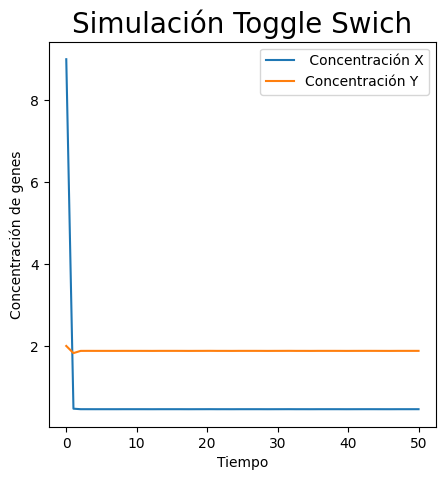

In [34]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 50)
plt.figure(figsize=(5,5))
plt.plot(times,np.array(varf)[0,0,:], label=" Concentración X")
plt.plot(times,np.array(varf)[0,1,:], label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()

In [35]:
np.shape(new_predictions)

(1, 7)

## Graficamos con los coeficientes predecidos

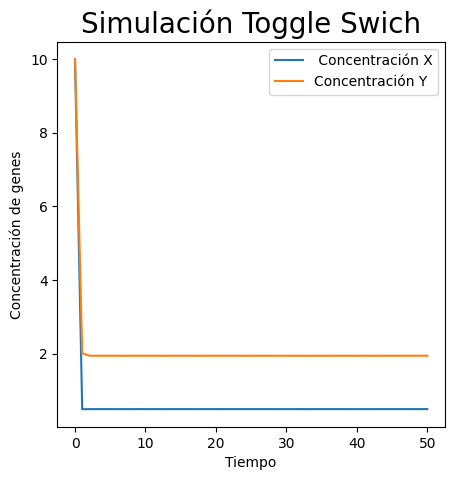

In [36]:
a1 = new_predictions[0,0]
a2 = new_predictions[0,1]
b1 = new_predictions[0,2]
b2 = new_predictions[0,3]
d1 = new_predictions[0,4]
d2 = new_predictions[0,5]
n = new_predictions[0,6]
 
def f(t, y):

    # asignar a cada ODE a un elemento de vector
    X = y[0]
    Y = y[1]

    # definimos cada ODE
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1

    return [dX_dt, dY_dt]

# Declaramos el vector de tiempo
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 50)

# Definimos las condiciones iniciales
y0 = np.array([10,10])

# Resolvemos
# Modificar manualmente el intervalo de tiempo
sol = solve_ivp(f, t_span, y0, t_eval=times)
# sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
tiempo = sol.t
var1 = sol.y[0]
var2 = sol.y[1]

# Graficamos
plt.figure(figsize=(5, 5))
plt.plot(tiempo, var1, label=" Concentración X")
plt.plot(tiempo, var2, label="Concentración Y")
plt.xlabel('Tiempo')
plt.ylabel('Concentración de genes')
plt.title('Simulación Toggle Swich', fontsize=20)
plt.legend()
plt.show()